LOAD DEPENDENCIES

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

LOAD AND PREPARE DATA

In [5]:
import os

path = os.listdir('BreastCancer/train/')
classes = {'NoCancer':0, 'Cancer':1}

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'BreastCancer/train/'

In [6]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'BreastCancer/train/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200, 200))
        X.append(img)
        Y.append(classes[cls])

NameError: name 'classes' is not defined

DATA ANALYSIS

In [12]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)
#x = np.linspace(X)
#y = np.linspace(Y)
#x = np.hstack([X,-X])
#y = np.hstack([Y,-Y])

TypeError: _linspace_dispatcher() missing 1 required positional argument: 'stop'

In [10]:
x.size()

TypeError: 'int' object is not callable

In [34]:
np.unique(Y)

array([0, 1])

In [35]:
pd.Series(Y).value_counts()

1    84
0    84
dtype: int64

In [36]:
X.shape, X_updated.shape

((168, 200, 200), (168, 40000))

DATA VISUALIZATION

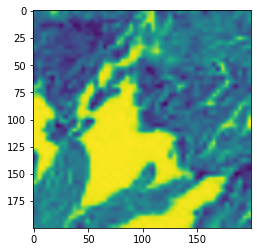

In [37]:
plt.imshow(X[0])

SPLIT DATA

In [38]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state = 10, test_size = 0.3)

In [39]:
xtrain.shape, xtest.shape

((134, 40000), (34, 40000))

FEATURE SCALING

In [40]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

250 11
254 16
0.9803921568627451 0.043137254901960784
0.996078431372549 0.06274509803921569


MODEL TRAINING

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [42]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C = 0.1)
lg.fit(xtrain, ytrain)

LogisticRegression(C=0.1)

In [43]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

EVALUATION

In [44]:
print("Training Score: ", lg.score(xtrain, ytrain))
print("Testing Score: ", lg.score(xtest, ytest))

Training Score:  1.0
Testing Score:  0.38235294117647056


In [45]:
print("Training Score: ", sv.score(xtrain, ytrain))
print("Testing Score: ", sv.score(xtest, ytest))

Training Score:  0.8582089552238806
Testing Score:  0.6764705882352942


PREDICTION

In [1]:
pred = sv.predict(xtest)
score = accuracy_score (predictions, ytest)

NameError: name 'sv' is not defined

In [47]:
misclassified = np.where(ytest != pred)
misclassified

(array([ 1,  2,  4, 17, 18, 19, 20, 23, 24, 27, 28], dtype=int64),)

In [48]:
print('Misclassified Predicted:', pred[28])
print('Actual Classification: ', ytest[28])

Misclassified Predicted: 1
Actual Classification:  0


In [49]:
print("Total Misclassified Samples: ", len(misclassified[0]))
print(pred[1],ytest[1])

Total Misclassified Samples:  11
1 0


TESTING ON 'TEST DATASET'

In [50]:
dec = {0:'NoCancer', 1:'Cancer'}

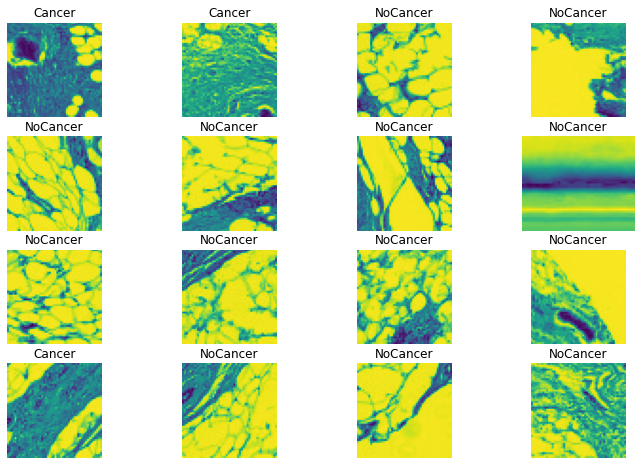

In [51]:
plt.figure(figsize=(12, 8))
p = os.listdir('BreastCancer/test/')
c=1
for i in os.listdir('BreastCancer/test/NoCancer/')[:16]: #testing first 9 images
    plt.subplot(4, 4, c)
    
    img = cv2.imread('BreastCancer/test/NoCancer/'+i,0)
    #plt.imshow(img)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img)
    plt.axis('off')
    c += 1

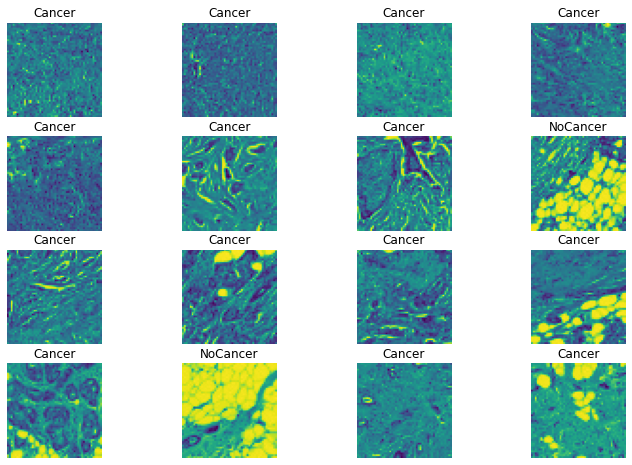

In [52]:
plt.figure(figsize = (12,8))
p = os.listdir('BreastCancer/test/')
c = 1
for i in os.listdir('BreastCancer/test/Cancer/')[:16]:
    plt.subplot(4,4,c)
    img = cv2.imread('BreastCancer/test/Cancer/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img)
    plt.axis('off')
    c += 1